# Predicting the Sale Price of Bulldozers using machine learning

1. Problem definition :
How well can we predict the future sale price of a bulldozer,given its characteristics and previous examples of how much similar bulldozers have been sold for.
2. Data:
The data is downloaded from the Kaggle Bluebook for Bulldozers competition

3. Features:
Kaggle provides a data dictionary detailing of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/1Im3Yq6ez5Yzz7lTfW66PThq1Se__a4P2r1apFkj2asc/edit?usp=sharing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Bulldozer_price/TrainAndValid.csv',low_memory=False,parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(412698, 53)

In [ ]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,412698
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,2004-10-19 01:54:17.182733952
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989-01-17 00:00:00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000-12-06 00:00:00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006-06-28 00:00:00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,2009-05-28 00:00:00
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,2012-04-28 00:00:00
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04,NaN


In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [ ]:
# Filling missing values

for label, content in df.items():
    if df[label].dtypes in [ 'int','float64']:
        if pd.isnull(content).sum():
          df[label] = df[label].fillna(df[label].median())


In [ ]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

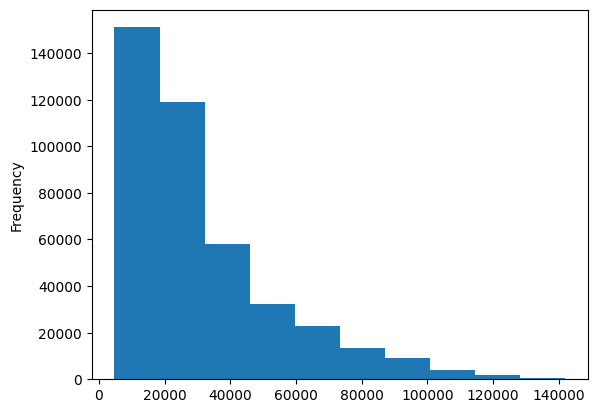

In [ ]:
df["SalePrice"].plot.hist();

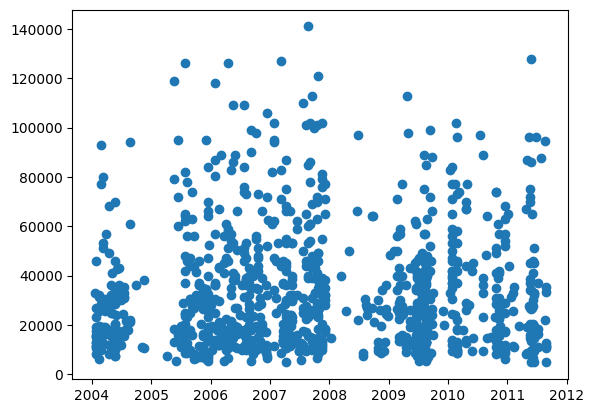

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [ ]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
# Sort DataFrame by date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayOfWeek"] = df.saledate.dt.dayofweek
df["saleDayOfYear"] = df.saledate.dt.dayofyear

In [ ]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'

df.drop("saledate", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
dict1 = {}
for label,content in df.items():
  if df[label].dtypes == 'object':
     dict1[label] = LabelEncoder()
     df[label] = dict1[label].fit_transform(df[label])

In [ ]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                     int64
fiModelDesc                   int64
fiBaseModel                   int64
fiSecondaryDesc               int64
fiModelSeries                 int64
fiModelDescriptor             int64
ProductSize                   int64
fiProductClassDesc            int64
state                         int64
ProductGroup                  int64
ProductGroupDesc              int64
Drive_System                  int64
Enclosure                     int64
Forks                         int64
Pad_Type                      int64
Ride_Control                  int64
Stick                         int64
Transmission                  int64
Turbocharged                  int64
Blade_Extension             

In [ ]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770.0,1821514.0,1505138.0,1671174.0,1329056.0
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363.0,1194089.0,1473654.0,1327630.0,1336053.0
ModelID,8434.0,10150.0,4139.0,8591.0,4089.0
datasource,132.0,132.0,132.0,132.0,132.0
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974.0,1980.0,1978.0,1980.0,1984.0
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,3.0,3.0,3.0,3.0,3.0
fiModelDesc,4592.0,1819.0,2347.0,1818.0,2118.0


In [ ]:
# Split data into training and test
df_test = df[df['saleYear'] == 2012]
df_train = df[df['saleYear'] != 2012]

len(df_test), len(df_train)

(11573, 401125)

In [ ]:
# Split data into X & y
x_train, y_train = df_train.drop("SalePrice", axis= 1), df_train["SalePrice"]
x_test, y_test = df_test.drop("SalePrice", axis=1), df_test["SalePrice"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((401125, 56), (401125,), (11573, 56), (11573,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


rf = RandomForestRegressor(random_state=42,
                             max_samples=10000)
dt = DecisionTreeRegressor(random_state=42)
xg = XGBRegressor(random_state=42,
                             max_samples=10000)

models = [rf,dt,xg]
dict1 = {}

for model in models:
  model.fit(x_train,y_train)
  y_preds_train = model.predict(x_train)
  y_preds = model.predict(x_test)
  dict1[model] = r2_score(y_test,y_preds)*100
  print(f"Training set r2_score for {model} : {r2_score(y_train,y_preds_train)*100}")
  print(f"Train set MAE : {mean_absolute_error(y_train,y_preds_train)}")
  print(f"Test set r2_score  : {r2_score(y_test,y_preds)*100}")
  print(f"Test set MAE : {mean_absolute_error(y_test,y_preds)}")
  print("--------------------------------------")

Training set r2_score for RandomForestRegressor(max_samples=10000, random_state=42) : 85.88245676562872
Train set MAE : 5594.445908108446
Test set r2_score  : 83.00040477848569
Test set MAE : 7180.740023330166
--------------------------------------
Training set r2_score for DecisionTreeRegressor(random_state=42) : 100.0
Train set MAE : 0.0
Test set r2_score  : 73.2812184321602
Test set MAE : 8633.283228203578
--------------------------------------
Training set r2_score for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=N

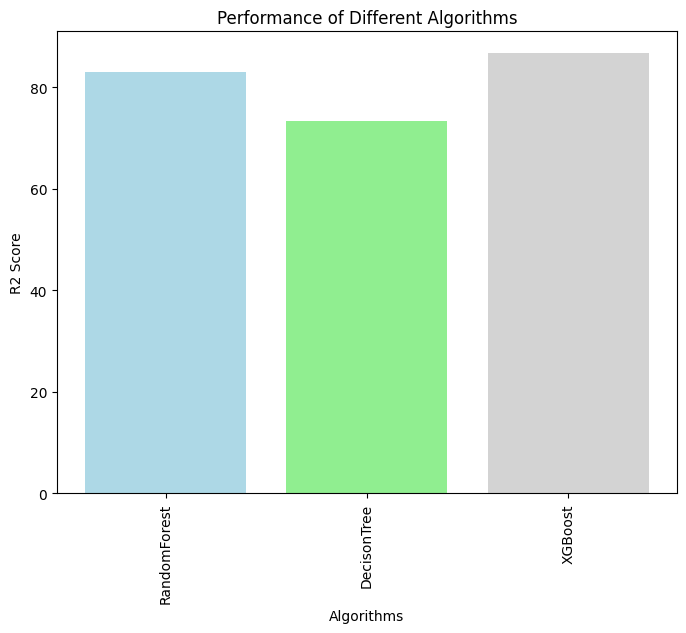

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
plt.bar (x = ['RandomForest','DecisonTree','XGBoost'] , height = dict1.values() , color = ['lightblue', 'lightgreen', 'lightgray'])

plt.title('Performance of Different Algorithms')
plt.xlabel ("Algorithms")
plt.ylabel ("R2 Score")
plt.show()

In [ ]:
# Create function to evaluate model on a few different levels
from sklearn.metrics import mean_absolute_error, r2_score

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Test MAE": mean_absolute_error(y_test, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Test R^2": r2_score(y_test, val_preds)}
    return scores

In [ ]:
# Score for xgboostregressor trained on full data

model = XGBRegressor()
model.fit(x_train,y_train)
show_scores(model)

{'Training MAE': 4956.790215202034,
 'Test MAE': 6447.058443827025,
 'Training R^2': 0.8956473601976467,
 'Test R^2': 0.866788146412415}

In [ ]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [ ]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(x_train, y_train)

CPU times: user 34.2 s, sys: 259 ms, total: 34.5 s
Wall time: 21.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
# Scores on model (only trained on ~10000 examples)

show_scores(model)

{'Training MAE': 5594.445908108446,
 'Test MAE': 7180.740023330166,
 'Training R^2': 0.8588245676562872,
 'Test R^2': 0.8300040477848569}

In [ ]:
%%time

# Training model on full data

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)

CPU times: user 12min 14s, sys: 2.85 s, total: 12min 16s
Wall time: 12min 36s


RandomForestRegressor()

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth" : [None, 3, 5, 10],
          "min_samples_split" : np.arange(2, 20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2),
          "max_features" : [0.5, 1, "sqrt", "log2"],
          "max_samples" : [10000]}

# Instantiate RandomSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs =-1,
                                               random_state=42),
                          param_distributions=rf_grid,
                          n_iter=10,
                          cv=5,
                          verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 2min 36s, sys: 2.76 s, total: 2min 39s
Wall time: 2min 6s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [ ]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 7244.733450406023,
 'Test MAE': 8362.61654027379,
 'Training R^2': 0.779776379052729,
 'Test R^2': 0.7754323580096806}

In [ ]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=60,
                                   min_samples_leaf=18,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the ideal model
ideal_model.fit(x_train, y_train)

CPU times: user 4min 2s, sys: 779 ms, total: 4min 3s
Wall time: 2min 28s


RandomForestRegressor(max_features=0.5, min_samples_leaf=18,
                      min_samples_split=14, n_estimators=60, n_jobs=-1,
                      random_state=42)

In [ ]:
# Scores for ideal model
show_scores(ideal_model)

{'Training MAE': 4369.713576909715,
 'Test MAE': 6177.748441155054,
 'Training R^2': 0.9102736761810398,
 'Test R^2': 0.8691384943610347}

## Feature importance

In [ ]:
# Find feature importance of our best model

len(ideal_model.feature_importances_)

56

In [ ]:
# function for plotting feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances,})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))

     # Plot the dataframe
    fig, ax  = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

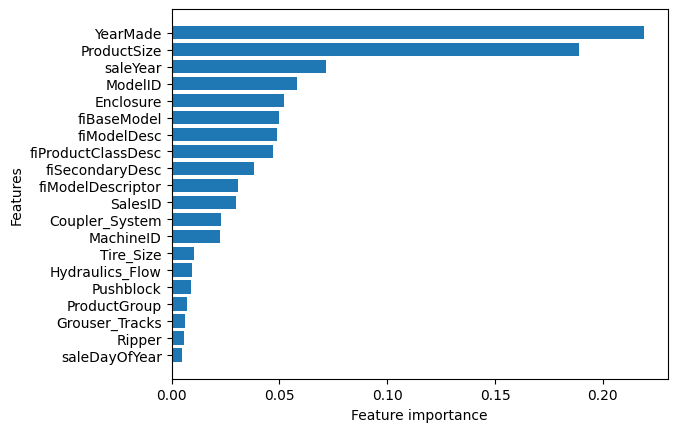

In [ ]:
plot_features(x_train.columns, ideal_model.feature_importances_)